# Initialization

In [131]:
#Imports
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import math
from scipy import signal
from plotly.offline import plot
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima_model import ARMA
from numpy import genfromtxt
from statsmodels.tsa.stattools import adfuller

In [92]:
# Make dataframes for states: EmotionalReg, Rest, Passive
neg_path = r'C:/Users/river/Documents/Project1_491/EmotionRegulation_Reduced'
neg_files = glob.glob(os.path.join(neg_path , "*.csv"))
neg_df = pd.concat((pd.read_csv(f) for f in neg_files), ignore_index=True)
neg_df.sort_values(by=['Time'])

rest_path = r'C:/Users/river/Documents/Project1_491/Resting_Reduced'
rest_files = glob.glob(os.path.join(rest_path , "*.csv"))
rest_df = pd.concat((pd.read_csv(f) for f in rest_files), ignore_index=True)
rest_df.sort_values(by=['Time'])

pass_path = r'C:/Users/river/Documents/Project1_491/PassiveViewing_Reduced'
pass_files = glob.glob(os.path.join(pass_path , "*.csv"))
pass_df = pd.concat((pd.read_csv(f) for f in pass_files), ignore_index=True)
pass_df.sort_values(by=['Time'])

,Time,Stimulus,Raw F3,Raw F4,F3-Cz,F4-Cz,F3-CMA,F4-CMA
0,0.0000,0,-3.876602,-2.589986,-3.620476,-2.333860,-3.876602,-2.589986
4521216,0.0000,0,-9.793930,-13.177590,-7.465608,-10.849268,-9.793930,-13.177590
4711680,0.0000,0,3.503904,2.069660,4.070962,2.636718,3.503904,2.069660
4906752,0.0000,0,2.359134,-5.095823,-1.902830,-9.357787,2.359134,-5.095823
5098496,0.0000,0,-0.592417,0.811995,-1.762188,-0.357777,-0.592417,0.811995
...,...,...,...,...,...,...,...,...
5312251,834.9844,0,3.124755,-2.957690,4.485268,-1.597177,3.124755,-2.957690
5312252,834.9883,0,1.436788,-4.548098,3.214227,-2.770659,1.436788,-4.548098
5312253,834.9922,0,-2.459007,-5.288458,-4.588259,-7.417710,-2.459007,-5.288458
5312254,834.9961,0,-0.249838,-1.655381,-4.420079,-5.825622,-0.249838,-1.655381


# Figure 1

In [93]:
# Common average re-reference
# Emotional Reg DF
neg_df['mean'] = neg_df.iloc[:, 2:8].mean(axis=1)
neg_df['Raw F3'] -= neg_df['mean']
neg_df['Raw F4'] -= neg_df['mean']
neg_df['F3-Cz'] -= neg_df['mean']
neg_df['F4-Cz'] -= neg_df['mean']
neg_df['F3-CMA'] -= neg_df['mean']
neg_df['F4-CMA'] -= neg_df['mean']

pass_df['mean'] = pass_df.iloc[:, 2:8].mean(axis=1)
pass_df['Raw F3'] -= pass_df['mean']
pass_df['Raw F4'] -= pass_df['mean']
pass_df['F3-Cz'] -= pass_df['mean']
pass_df['F4-Cz'] -= pass_df['mean']
pass_df['F3-CMA'] -= pass_df['mean']
pass_df['F4-CMA'] -= pass_df['mean']

rest_df['mean'] = rest_df.iloc[:, 2:8].mean(axis=1)
rest_df['Raw F3'] -= rest_df['mean']
rest_df['Raw F4'] -= rest_df['mean']
rest_df['F3-Cz'] -= rest_df['mean']
rest_df['F4-Cz'] -= rest_df['mean']
rest_df['F3-CMA'] -= rest_df['mean']
rest_df['F4-CMA'] -= rest_df['mean']

<AxesSubplot:xlabel='Time'>

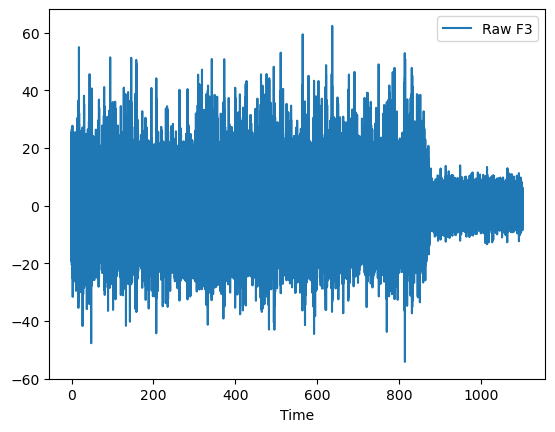

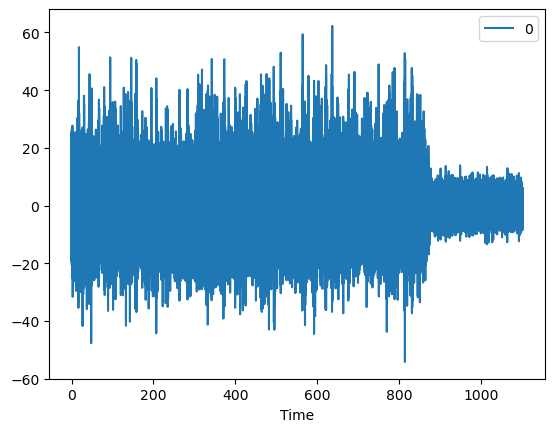

In [155]:
neg_F3 = neg_df[['Time', 'Raw F3']].copy()
neg_F3.plot(x='Time', y='Raw F3')

neg_F3_detrend = signal.detrend(neg_F3['Raw F3'])

detrended = pd.DataFrame(neg_F3_detrend)
detrended['Time'] = neg_df['Time'].copy()
detrended.plot(x='Time')

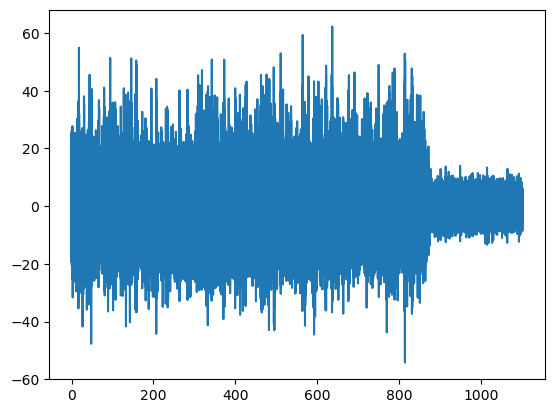

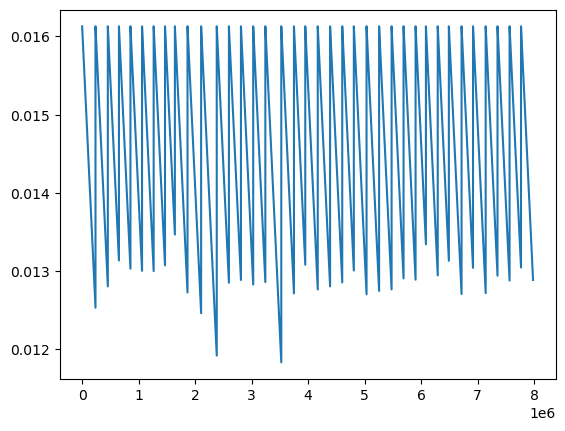

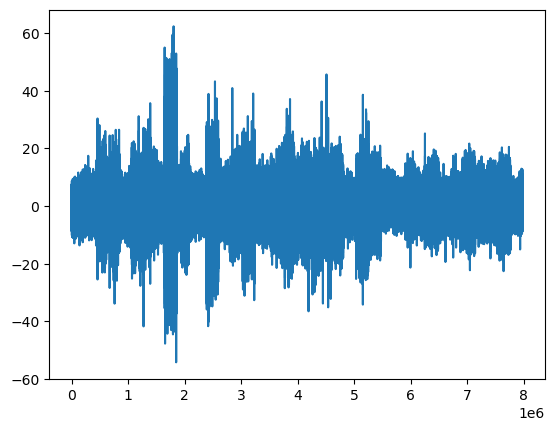